# *1．要点*

●学習率の決め方　

・初期の学習率設定方法の方針

　　→　初期の学習率を大きく設定し徐々に学習率を小さくしていく

　　→　パラメータごとにが悪臭率を可変させる

※　**学習率最適化手法を利用して学習率を最適化**

●学習率最適化手法

①モメンタム　　②AdaGrad　　③RMSProp　　④Adam

**①モメンタム**　：誤差をパラメータで微分したものと学習率を減算した後、現在の重みに前回の重みを減算した値と完成の積を加算する

【モメンタムの更新式】

$V_t = \mu V_{t-1} - \epsilon \nabla E$

$w^{t+1} = w^t + V_t \;\;\; \mu : 慣性$ 

　【勾配降下法の更新式】

　誤差をパラメータで微分したものと学習率の積を減算する

$w^{t + 1} = w^t - \epsilon \nabla E$





※モメンタムのメリット：局所的最適解にはならず大域的最適解となる。谷間についてから最適値に行くまでの時間が早い

【数式とコード】


$V_t = \mu V_{t-1} - \epsilon \nabla E$

self.v[key] = self.momentum * self.v[key] - self.learning_rate * grad[key]

$w^{t+1} = w^t + V_t \;\;\; \mu : 慣性$ 

params[key] += self.v[key]

**②AdaGrad：誤差をパラメータで微分したものと再定義した学習率の積を減算する**

【AdaGradの更新式】

$h_0 = θ$

$h_t = h_{t-1} + (\nabla E)^2$

$\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + θ}\nabla E$

AdaGradのメリット：勾配の緩やかな斜面に対して、最適値に近づける

課題：学習率が徐々に小さくなるので**鞍点問題**を引き起こすことがある

【数式とコード】

$h_0 = θ$

self.h[key] = np.zeros_like(val)


$h_t = h_{t-1} + (\nabla E)^2$

self.h[key] += grad[key] * grad[key]

$\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + θ}\nabla E$

params[key] -= self.learning_rate * grad[key] / (np.sqrt[self.h[key] + 1e-7])

**③RMSProp：誤差をパラメータで微分したものと再定義した学習率の積を減算する**

$
h_t = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^2
$

$
\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + \theta} \nabla E
$

RMSProp のメリット：局所的最適解にはならず、大域的最適解となる(AdaGradで生じ得る鞍点問題を解決)


　　　　　　　　　　ハイパーパラメータの調整が必要な場合が少ない

　　【数式とコード】


$
h_t = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^2
$

self.h[key] *= self.decay_rate

self.h[]key += (1-self.decay_rate) * grad[key] * grad[key]


$
\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + \theta} \nabla E
$

params[key] -= self.learning_rate * grad[key] / (np.sqrt(self.h[key]) + 1e-7) 

**④Adam：モメンタムの過去の勾配の指数関数的減衰平均，RMSPropの過去の勾配の2乗の指数関数的減衰平均を孕んだ最適化アルゴリズム**

Adamのメリット：モメンタムおよびRMSPropのメリットを孕んだアルゴルズム

# *2．確認テスト*

**確認テスト　モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ**

**解答**　

①モメンタム　：誤差をパラメータで微分したものと学習率を減算した後、現在の重みに前回の重みを減算した値と完成の積を加算する．

メリット：局所的最適解にはならず大域的最適解となる。谷間についてから最適値に行くまでの時間が早い

【モメンタムの更新式】

$V_t = \mu V_{t-1} - \epsilon \nabla E$

$w^{t+1} = w^t + V_t \;\;\; \mu : 慣性$ 

②AdaGrad：誤差をパラメータで微分したものと再定義した学習率の積を減算する．メリットは勾配の緩やかな斜面に対して、最適値に近づける

課題：学習率が徐々に小さくなるので鞍点問題を引き起こすことがある

【AdaGradの更新式】

$h_0 = θ$

$h_t = h_{t-1} + (\nabla E)^2$

$\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + θ}\nabla E$

③RMSProp：誤差をパラメータで微分したものと再定義した学習率の積を減算する．メリットは局所的最適解にはならず、大域的最適解となる(AdaGradで生じ得る鞍点問題を解決)


　　　　　　　　　　ハイパーパラメータの調整が必要な場合が少ない

$
h_t = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^2
$

$
\displaystyle w^{t+1} = w^t - \epsilon \frac{1}{\sqrt{h_t} + \theta} \nabla E
$

# *3．実装演習*

# *準備*

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2/lesson_2')

# optimizer

## SDG

In [ ]:
import sys, os
sys.path.append(os.pardir)  #親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict #コンテナデータ型　OrderDict:項目が追加された順序を記憶する辞書のサブクラス
from common import layers         #fail
from data.mnist import load_mnist #fail
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet #faile #path:DNN_code_colab_lesson_1_2/lesson_2


In [ ]:
#データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読込み完了")

データ読込み完了


In [ ]:
x_train[0], d_train[0] #確認

In [ ]:
#batch_normalizationの設定**********
# use_batchnorm = True
use_batchnorm = False
#***********************************

In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01, use_batchnorm=use_batchnorm)

In [ ]:
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        

Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.098
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.098
Generation: 30. 正答率(トレーニング) = 0.03
                : 30. 正答率(テスト) = 0.098
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.098
Generation: 50. 正答率(トレーニング) = 0.12
                : 50. 正答率(テスト) = 0.098
Generation: 60. 正答率(トレーニング) = 0.09
                : 60. 正答率(テスト) = 0.098
Generation: 70. 正答率(トレーニング) = 0.1
                : 70. 正答率(テスト) = 0.098
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.0958
Generation: 90. 正答率(トレーニング) = 0.15
                : 90. 正答率(テスト) = 0.1028
Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1028
Generation: 110. 正答率(トレーニング) = 0.09
                : 110. 正答率(テスト) = 0.1028
Generation: 120. 正答率(トレーニング) = 0.08
                : 120. 正答率(テスト) = 0.1028
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.1135
Generation: 140. 正答率(トレーニ

In [ ]:
lists = range(0, iters_num, plot_interval)

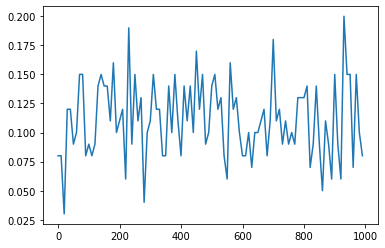

In [ ]:
plt.plot(lists, accuracies_train, label="training set")

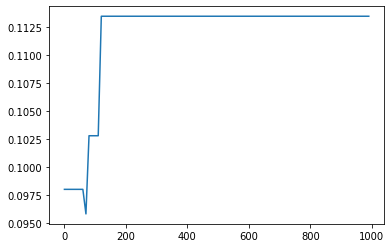

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")

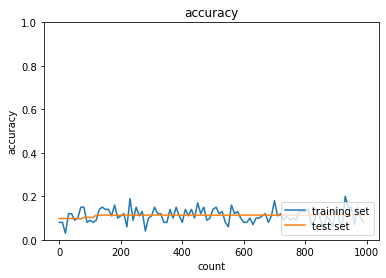

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

データ読み込み完了


In [ ]:
# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        

Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.17
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.08
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.1
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.07
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.14
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.1135
Generation: 140. 正答率

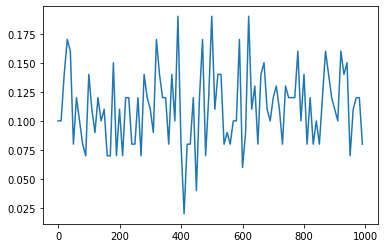

In [ ]:
plt.plot(lists, accuracies_train, label="training set")

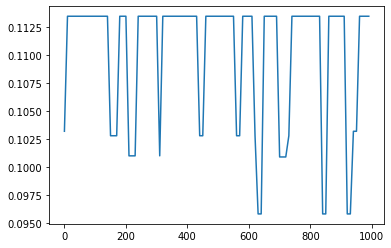

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")

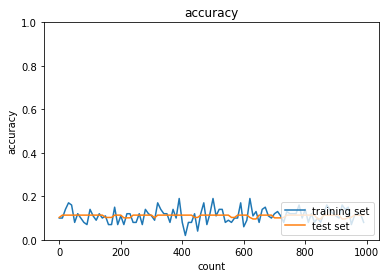

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

In [ ]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

データ読み込み完了


In [ ]:
# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
     

Generation: 10. 正答率(トレーニング) = 0.07
                : 10. 正答率(テスト) = 0.1028
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.1
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.04
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.07
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.1
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.14
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.1
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.07
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.17
                : 130. 正答率(テスト) = 0.1135
Generation: 140. 正答率

In [ ]:
lists = range(0, iters_num, plot_interval)

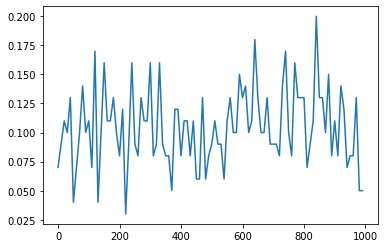

In [ ]:
plt.plot(lists, accuracies_train, label="training set")

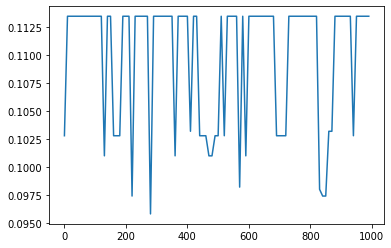

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")

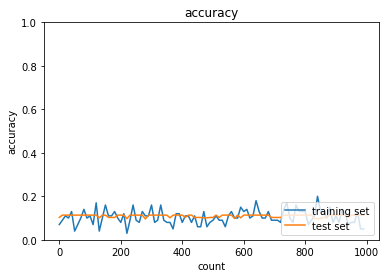

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

データ読み込み完了


In [ ]:
# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
     

Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.2058
Generation: 30. 正答率(トレーニング) = 0.23
                : 30. 正答率(テスト) = 0.29
Generation: 40. 正答率(トレーニング) = 0.38
                : 40. 正答率(テスト) = 0.3188
Generation: 50. 正答率(トレーニング) = 0.33
                : 50. 正答率(テスト) = 0.3351
Generation: 60. 正答率(トレーニング) = 0.39
                : 60. 正答率(テスト) = 0.3856
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.4207
Generation: 80. 正答率(トレーニング) = 0.53
                : 80. 正答率(テスト) = 0.5036
Generation: 90. 正答率(トレーニング) = 0.5
                : 90. 正答率(テスト) = 0.4805
Generation: 100. 正答率(トレーニング) = 0.61
                : 100. 正答率(テスト) = 0.5423
Generation: 110. 正答率(トレーニング) = 0.67
                : 110. 正答率(テスト) = 0.6415
Generation: 120. 正答率(トレーニング) = 0.65
                : 120. 正答率(テスト) = 0.6321
Generation: 130. 正答率(トレーニング) = 0.65
                : 130. 正答率(テスト) = 0.6006
Generation: 140. 正答率(

In [ ]:
lists = range(0, iters_num, plot_interval)

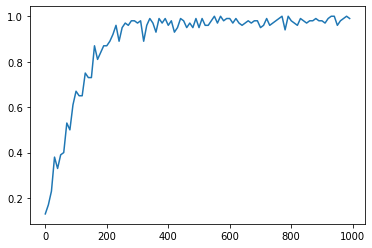

In [ ]:
plt.plot(lists, accuracies_train, label="training set")


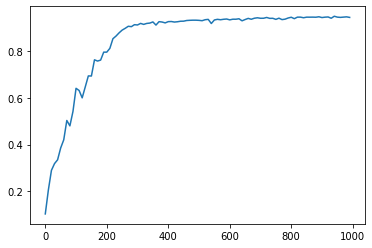

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")


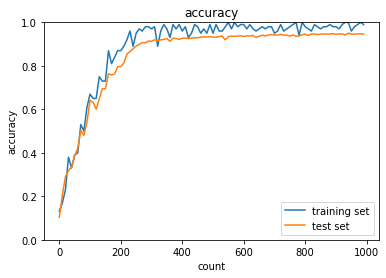

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


データ読み込み完了


In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                


Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1405
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.2109
Generation: 50. 正答率(トレーニング) = 0.22
                : 50. 正答率(テスト) = 0.2097
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.2147
Generation: 70. 正答率(トレーニング) = 0.24
                : 70. 正答率(テスト) = 0.2873
Generation: 80. 正答率(トレーニング) = 0.36
                : 80. 正答率(テスト) = 0.3646
Generation: 90. 正答率(トレーニング) = 0.44
                : 90. 正答率(テスト) = 0.3304
Generation: 100. 正答率(トレーニング) = 0.4
                : 100. 正答率(テスト) = 0.3765
Generation: 110. 正答率(トレーニング) = 0.34
                : 110. 正答率(テスト) = 0.3976
Generation: 120. 正答率(トレーニング) = 0.4
                : 120. 正答率(テスト) = 0.4566
Generation: 130. 正答率(トレーニング) = 0.43
                : 130. 正答率(テスト) = 0.4475
Generation: 140. 正答率

In [ ]:
lists = range(0, iters_num, plot_interval)

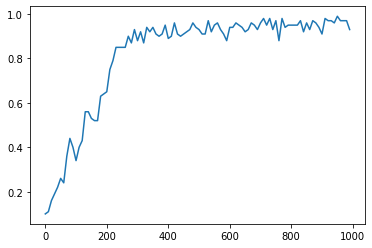

In [ ]:
plt.plot(lists, accuracies_train, label="training set")

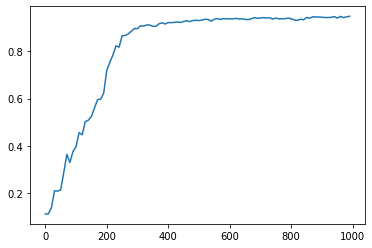

In [ ]:
plt.plot(lists, accuracies_test,  label="test set")

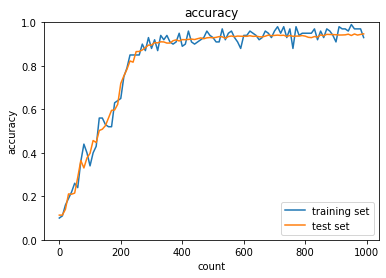

In [ ]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう

**try1:learning_rate = 0.1**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.16
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.0974
Generation: 40. 正答率(トレーニング) = 0.16
                : 40. 正答率(テスト) = 0.101
Generation: 50. 正答率(トレーニング) = 0.15
                : 50. 正答率(テスト) = 0.0958
Generation: 60. 正答率(トレーニング) = 0.09
                : 60. 正答率(テスト) = 0.101
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1028
Generation: 80. 正答率(トレーニング) = 0.06
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1032
Generation: 110. 正答率(トレーニング) = 0.1
                : 110. 正答率(テスト) = 0.098
Generation: 120. 正答率(トレーニング) = 0.11
                : 120. 正答率(テスト) = 0.1028
Generation: 130. 正答率(トレーニング) = 0.12
                : 130. 正答率(テスト) = 0.098
Generation: 14

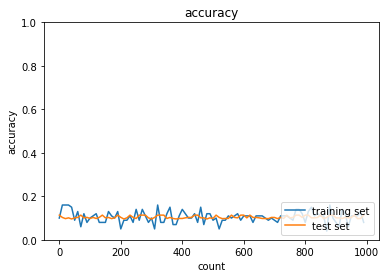

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**tyr2:learning_rate = 0.05**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.0974
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.101
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.1
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.11
                : 70. 正答率(テスト) = 0.0982
Generation: 80. 正答率(トレーニング) = 0.1
                : 80. 正答率(テスト) = 0.101
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1028
Generation: 100. 正答率(トレーニング) = 0.16
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.1
                : 120. 正答率(テスト) = 0.0974
Generation: 130. 正答率(トレーニング) = 0.07
                : 130. 正答率(テスト) = 0.0974
Generation: 1

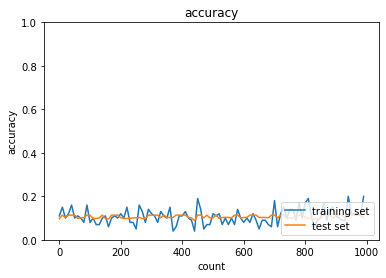

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try3:learning_rate = 0.005**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.098
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1011
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1152
Generation: 40. 正答率(トレーニング) = 0.17
                : 40. 正答率(テスト) = 0.1634
Generation: 50. 正答率(トレーニング) = 0.24
                : 50. 正答率(テスト) = 0.2007
Generation: 60. 正答率(トレーニング) = 0.24
                : 60. 正答率(テスト) = 0.2093
Generation: 70. 正答率(トレーニング) = 0.21
                : 70. 正答率(テスト) = 0.2137
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.2144
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.2176
Generation: 100. 正答率(トレーニング) = 0.14
                : 100. 正答率(テスト) = 0.2143
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.215
Generation: 120. 正答率(トレーニング) = 0.18
                : 120. 正答率(テスト) = 0.2353
Generation: 130. 正答率(トレーニング) = 0.25
                : 130. 正答率(テスト) = 0.2447
Generation

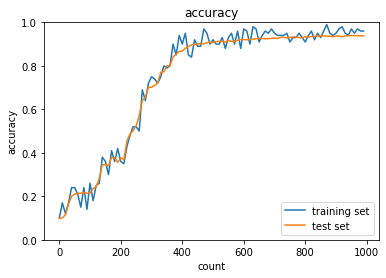

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.005
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

**try1:activation='ReLU'**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1364
Generation: 20. 正答率(トレーニング) = 0.43
                : 20. 正答率(テスト) = 0.3541
Generation: 30. 正答率(トレーニング) = 0.48
                : 30. 正答率(テスト) = 0.5028
Generation: 40. 正答率(トレーニング) = 0.66
                : 40. 正答率(テスト) = 0.6853
Generation: 50. 正答率(トレーニング) = 0.72
                : 50. 正答率(テスト) = 0.7441
Generation: 60. 正答率(トレーニング) = 0.75
                : 60. 正答率(テスト) = 0.7503
Generation: 70. 正答率(トレーニング) = 0.79
                : 70. 正答率(テスト) = 0.7879
Generation: 80. 正答率(トレーニング) = 0.85
                : 80. 正答率(テスト) = 0.8278
Generation: 90. 正答率(トレーニング) = 0.83
                : 90. 正答率(テスト) = 0.7965
Generation: 100. 正答率(トレーニング) = 0.8
                : 100. 正答率(テスト) = 0.792
Generation: 110. 正答率(トレーニング) = 0.83
                : 110. 正答率(テスト) = 0.85
Generation: 120. 正答率(トレーニング) = 0.86
                : 120. 正答率(テスト) = 0.8672
Generation: 130. 正答率(トレーニング) = 0.87
                : 130. 正答率(テスト) = 0.8679
Generation:

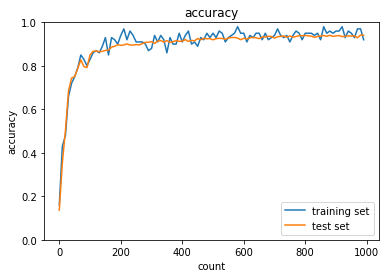

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try2: weight_init_std = xavier**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4
                : 10. 正答率(テスト) = 0.3698
Generation: 20. 正答率(トレーニング) = 0.38
                : 20. 正答率(テスト) = 0.4053
Generation: 30. 正答率(トレーニング) = 0.39
                : 30. 正答率(テスト) = 0.4757
Generation: 40. 正答率(トレーニング) = 0.6
                : 40. 正答率(テスト) = 0.5813
Generation: 50. 正答率(トレーニング) = 0.65
                : 50. 正答率(テスト) = 0.6299
Generation: 60. 正答率(トレーニング) = 0.59
                : 60. 正答率(テスト) = 0.6485
Generation: 70. 正答率(トレーニング) = 0.75
                : 70. 正答率(テスト) = 0.7027
Generation: 80. 正答率(トレーニング) = 0.78
                : 80. 正答率(テスト) = 0.7582
Generation: 90. 正答率(トレーニング) = 0.8
                : 90. 正答率(テスト) = 0.789
Generation: 100. 正答率(トレーニング) = 0.76
                : 100. 正答率(テスト) = 0.8138
Generation: 110. 正答率(トレーニング) = 0.79
                : 110. 正答率(テスト) = 0.808
Generation: 120. 正答率(トレーニング) = 0.82
                : 120. 正答率(テスト) = 0.8395
Generation: 130. 正答率(トレーニング) = 0.87
                : 130. 正答率(テスト) = 0.8453
Generation: 

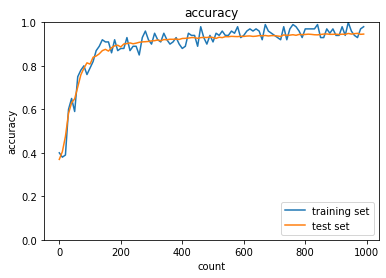

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.005
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

**try3: weight_init_std='he'**

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.47
                : 10. 正答率(テスト) = 0.4288
Generation: 20. 正答率(トレーニング) = 0.58
                : 20. 正答率(テスト) = 0.5925
Generation: 30. 正答率(トレーニング) = 0.62
                : 30. 正答率(テスト) = 0.615
Generation: 40. 正答率(トレーニング) = 0.61
                : 40. 正答率(テスト) = 0.6717
Generation: 50. 正答率(トレーニング) = 0.73
                : 50. 正答率(テスト) = 0.7175
Generation: 60. 正答率(トレーニング) = 0.78
                : 60. 正答率(テスト) = 0.7459
Generation: 70. 正答率(トレーニング) = 0.82
                : 70. 正答率(テスト) = 0.8028
Generation: 80. 正答率(トレーニング) = 0.76
                : 80. 正答率(テスト) = 0.8261
Generation: 90. 正答率(トレーニング) = 0.85
                : 90. 正答率(テスト) = 0.8594
Generation: 100. 正答率(トレーニング) = 0.91
                : 100. 正答率(テスト) = 0.8698
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.882
Generation: 120. 正答率(トレーニング) = 0.89
                : 120. 正答率(テスト) = 0.8897
Generation: 130. 正答率(トレーニング) = 0.92
                : 130. 正答率(テスト) = 0.8926
Generatio

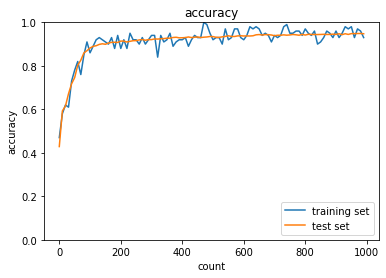

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='he',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.005
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.28
                : 10. 正答率(テスト) = 0.3134
Generation: 20. 正答率(トレーニング) = 0.35
                : 20. 正答率(テスト) = 0.314
Generation: 30. 正答率(トレーニング) = 0.58
                : 30. 正答率(テスト) = 0.5902
Generation: 40. 正答率(トレーニング) = 0.58
                : 40. 正答率(テスト) = 0.6218
Generation: 50. 正答率(トレーニング) = 0.77
                : 50. 正答率(テスト) = 0.7377
Generation: 60. 正答率(トレーニング) = 0.76
                : 60. 正答率(テスト) = 0.77
Generation: 70. 正答率(トレーニング) = 0.77
                : 70. 正答率(テスト) = 0.7905
Generation: 80. 正答率(トレーニング) = 0.76
                : 80. 正答率(テスト) = 0.802
Generation: 90. 正答率(トレーニング) = 0.81
                : 90. 正答率(テスト) = 0.8174
Generation: 100. 正答率(トレーニング) = 0.9
                : 100. 正答率(テスト) = 0.8519
Generation: 110. 正答率(トレーニング) = 0.84
                : 110. 正答率(テスト) = 0.8254
Generation: 120. 正答率(トレーニング) = 0.79
                : 120. 正答率(テスト) = 0.8133
Generation: 130. 正答率(トレーニング) = 0.84
                : 130. 正答率(テスト) = 0.8344
Generation: 

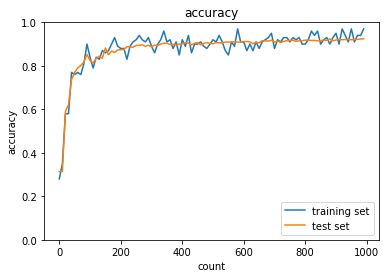

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
#use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()